# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Train data set**

In [180]:
train=pd.read_csv('/content/train_v9rqX0R.csv')

In [182]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [183]:
train.shape

(8523, 12)

In [184]:
eval=pd.read_csv('/content/test_AbJTz2l.csv')
eval.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [185]:
eval.shape

(5681, 11)

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [187]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [188]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [189]:
eval['Item_Identifier'].nunique()

1543

In [190]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [191]:
eval['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [192]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [193]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [194]:
OutletSize_Mode=train['Outlet_Size'].mode()[0]
train['Outlet_Size']=train['Outlet_Size'].fillna(OutletSize_Mode)

In [195]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [196]:
train[train['Item_Weight'].isna()]['Item_Identifier']

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [197]:
weight=train[train['Item_Identifier']=='FDP10']['Item_Weight'].dropna().to_list()
weight[0]

19.0

In [198]:
train[train['Item_Identifier']=='DRI11']['Item_Weight']

18       NaN
1366     NaN
3127    8.26
5310    8.26
7022    8.26
7192    8.26
8483    8.26
Name: Item_Weight, dtype: float64

In [199]:
train[train['Item_Identifier']=='NCN18']['Item_Weight']

524     8.895
1089    8.895
3986    8.895
6069    8.895
8504      NaN
Name: Item_Weight, dtype: float64

In [200]:
Item_Identifier_list=train[train['Item_Weight'].isna()]['Item_Identifier'].to_list()

In [201]:
item_id_Weight_dict={}
for id in Item_Identifier_list:
  weight=train[train['Item_Identifier']==id]['Item_Weight'].dropna().to_list()
  if weight:
    item_id_Weight_dict[id]=weight[0]

In [202]:
item_id_Weight_dict

{'FDP10': 19.0,
 'DRI11': 8.26,
 'FDW12': 8.315,
 'FDC37': 15.5,
 'FDC14': 14.5,
 'FDV20': 20.2,
 'FDX10': 6.385,
 'FDB34': 15.25,
 'FDS02': 10.195,
 'FDI26': 5.94,
 'FDF09': 6.215,
 'FDY40': 15.5,
 'FDY45': 17.5,
 'FDN48': 13.35,
 'NCL18': 18.85,
 'FDR12': 12.6,
 'FDQ49': 20.2,
 'FDU04': 7.93,
 'NCP18': 12.15,
 'FDD10': 20.6,
 'DRE60': 9.395,
 'FDW39': 6.69,
 'FDX34': 6.195,
 'FDY25': 12.0,
 'NCR53': 12.15,
 'FDH35': 18.25,
 'DRK12': 9.5,
 'FDR07': 21.35,
 'NCB30': 14.6,
 'DRY23': 9.395,
 'FDQ28': 14.0,
 'NCO17': 10.0,
 'FDT12': 6.215,
 'FDO08': 11.1,
 'NCX06': 17.6,
 'FDE40': 15.6,
 'FDX49': 4.615,
 'FDI24': 10.3,
 'FDS45': 5.175,
 'NCO07': 9.06,
 'DRF27': 8.93,
 'FDX25': 16.7,
 'NCX42': 6.36,
 'FDG33': 5.365,
 'DRM47': 9.3,
 'FDS46': 17.6,
 'FDX21': 7.05,
 'NCU05': 11.8,
 'DRF15': 18.35,
 'FDQ04': 6.4,
 'FDH19': 19.35,
 'FDZ10': 17.85,
 'NCF07': 9.0,
 'FDJ08': 11.1,
 'FDM25': 10.695,
 'FDV60': 20.2,
 'FDV13': 17.35,
 'FDM50': 13.0,
 'FDY31': 5.98,
 'DRQ35': 9.3,
 'NCW17': 18.0,
 'FD

In [203]:
train[train['Item_Weight'].isna()].index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [204]:
item_with_fullNull=[]
for i in train[train['Item_Weight'].isna()].index:
  row=train.iloc[[i]]
  z=row['Item_Identifier'].values
  if(item_id_Weight_dict.get(z[0])):
    train.loc[i,'Item_Weight'] = item_id_Weight_dict[z[0]]
  else:
    item_with_fullNull.append(z)

In [205]:
item_with_fullNull

[array(['FDN52'], dtype=object),
 array(['FDK57'], dtype=object),
 array(['FDE52'], dtype=object),
 array(['FDQ60'], dtype=object)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


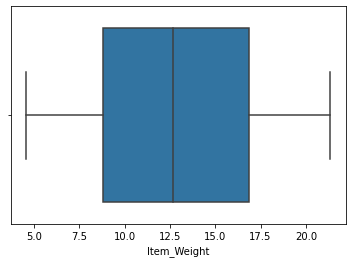

In [206]:
sns.boxplot(train['Item_Weight'])

In [207]:
Item_Weight_Mean=train['Item_Weight'].mean()
print(Item_Weight_Mean)
train['Item_Weight']=train['Item_Weight'].fillna(Item_Weight_Mean)


12.875420237117032


In [208]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

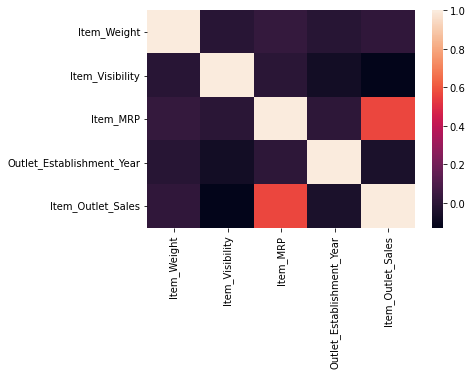

In [209]:
sns.heatmap(train.corr())

In [210]:
eval.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [211]:
OutletSize_Modes=eval['Outlet_Size'].mode()[0]
eval['Outlet_Size']=eval['Outlet_Size'].fillna(OutletSize_Modes)

In [212]:
Item_Identifier_list_eval=eval[eval['Item_Weight'].isna()]['Item_Identifier'].to_list()

In [213]:
item_id_Weight_dict_evals={}
for id in Item_Identifier_list_eval:
  weights=eval[eval['Item_Identifier']==id]['Item_Weight'].dropna().to_list()
  if weights:
    item_id_Weight_dict_evals[id]=weights[0]

In [214]:
item_with_fullNulls=[]
for i in eval[eval['Item_Weight'].isna()].index:
  rows=eval.iloc[[i]]
  z1=rows['Item_Identifier'].values
  if(item_id_Weight_dict_evals.get(z1[0])):
    eval.loc[i,'Item_Weight'] = item_id_Weight_dict_evals[z1[0]]
  else:
    item_with_fullNulls.append(z1)

In [215]:
item_with_fullNulls

[array(['FDL58'], dtype=object),
 array(['FDY57'], dtype=object),
 array(['FDH58'], dtype=object),
 array(['FDI45'], dtype=object),
 array(['FDG50'], dtype=object),
 array(['FDG57'], dtype=object),
 array(['FDJ09'], dtype=object),
 array(['FDF22'], dtype=object),
 array(['FDI45'], dtype=object),
 array(['FDF22'], dtype=object),
 array(['FDG50'], dtype=object),
 array(['FDL58'], dtype=object),
 array(['DRN47'], dtype=object),
 array(['NCJ30'], dtype=object),
 array(['FDT21'], dtype=object),
 array(['FDO22'], dtype=object),
 array(['FDG09'], dtype=object),
 array(['FDF05'], dtype=object),
 array(['FDP28'], dtype=object),
 array(['FDF04'], dtype=object)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


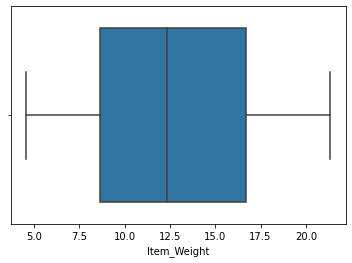

In [216]:
sns.boxplot(eval['Item_Weight'])

In [217]:
Item_Weight_Means=eval['Item_Weight'].mean()
print(Item_Weight_Means)
eval['Item_Weight']=eval['Item_Weight'].fillna(Item_Weight_Mean)


12.675975975975975


In [218]:
eval.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [219]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [220]:
eval.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [221]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [222]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [223]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], 'Regular')

In [224]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [225]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [226]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [227]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [228]:
eval.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,13.600,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [229]:
eval['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [230]:
eval['Item_Fat_Content'] = eval['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
eval['Item_Fat_Content'] = eval['Item_Fat_Content'].replace(['reg'], 'Regular')

In [231]:
eval['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [232]:
eval['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [233]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [234]:
eval['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

# **Encoding Categorical values**

In [235]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [
                                     ('ord_col2',OneHotEncoder(),[1])])
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 6, 7, 8])], remainder='passthrough')
Encoded_X = np.array(ct.fit_transform(X))

In [180]:
Encoded_X

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [236]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [237]:
eval['Item_Fat_Content'] = eval['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [238]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})

In [239]:
eval['Outlet_Size'] = eval['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})

In [240]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

In [241]:
eval['Outlet_Location_Type'] = eval['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])

train['Item_Type'] = le.fit_transform(train['Item_Type'])

In [243]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()

eval['Outlet_Type'] = le.fit_transform(eval['Outlet_Type'])

eval['Item_Type'] = le.fit_transform(eval['Item_Type'])

In [244]:
cols = ['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train.loc[:,cols] = sc.fit_transform(train[cols])

In [245]:
cols1 = ['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year']
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
eval.loc[:,cols1] = sc.fit_transform(eval[cols1])

In [246]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.769779,0,-0.970732,-0.766479,1.747454,0.139541,1,1,1,3735.1380
1,-1.497485,1,-0.908111,1.608963,-1.489023,1.334103,1,3,2,443.4228
2,0.995661,0,-0.956917,0.658786,0.010040,0.139541,1,1,1,2097.2700
3,1.361666,1,-1.281758,-0.291391,0.660050,0.020085,1,3,0,732.3800
4,-0.849439,0,-1.281758,0.421242,-1.399220,-1.293934,2,3,1,994.7052


In [247]:
eval.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.736587,0,-1.134077,1.366916,-0.536555,0.139891,1,1,1
1,-0.941432,1,-0.531850,-0.766450,-0.868937,1.095512,1,2,1
2,0.413710,0,0.661316,0.892835,1.629848,0.020438,1,3,0
3,-1.153307,0,-0.981416,1.366916,0.226697,1.095512,1,2,1
4,0.198608,1,1.032540,-0.766450,1.508110,-1.532446,1,3,3


# **X and Y splitting**

In [248]:
X=train.drop('Item_Outlet_Sales',axis=1)
Y=train['Item_Outlet_Sales']

In [249]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769779,0,-0.970732,-0.766479,1.747454,0.139541,1,1,1
1,-1.497485,1,-0.908111,1.608963,-1.489023,1.334103,1,3,2
2,0.995661,0,-0.956917,0.658786,0.010040,0.139541,1,1,1
3,1.361666,1,-1.281758,-0.291391,0.660050,0.020085,1,3,0
4,-0.849439,0,-1.281758,0.421242,-1.399220,-1.293934,2,3,1


In [250]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [252]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 1464548.4426692263


In [253]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 1464548.4426692263


In [254]:
space = {
    'max_depth': hp.choice('max_depth',[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
    'n_estimators': hp.choice('n_estimators',[100,150,200,250,400,500]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [2,3,4,5]),
    'min_samples_split':hp.choice('min_samples_split',[1,2,3,4,5,6]),
    }

In [255]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def hyperparameter_tuning(params):
    clf = RandomForestRegressor(**params,n_jobs=-1)
    acc = mean_squared_error(y_test, y_pred_rf).mean()
    return {"loss": -acc, "status": STATUS_OK}
    

In [259]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [00:00<00:00, 127.94it/s, best loss: -1224073.2541023332]
Best: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 3}


In [260]:
rf1 = RandomForestRegressor(max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=3, random_state=42)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

1464548.4426692263


In [261]:
y_pred_rf_eval= rf1.predict(eval)
y_pred_rf_eval

array([1580.24506734, 1580.24506734,  469.87561795, ..., 1580.24506734,
       3310.98394237, 1580.24506734])

In [262]:
eval1=pd.read_csv('/content/test_AbJTz2l.csv')

In [265]:
output = pd.DataFrame()
output[['Item_Identifier','Outlet_Identifier']] = eval1[['Item_Identifier','Outlet_Identifier']]
output['Item_Outlet_Sales'] = abs(y_pred_rf_eval)
output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1580.245067
1,FDW14,OUT017,1580.245067
2,NCN55,OUT010,469.875618
3,FDQ58,OUT017,3310.983942
4,FDY38,OUT027,3310.983942
...,...,...,...
5676,FDB58,OUT046,1580.245067
5677,FDD47,OUT018,3310.983942
5678,NCO17,OUT045,1580.245067
5679,FDJ26,OUT017,3310.983942


In [268]:
output.to_csv('output.csv',index = False)